In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///porfolio.db
    
con = sqlite3.connect("C:/Users/nickh/OneDrive - Northeastern University/Notebooks/Intern/project/porfolio.db")

In [4]:
cur = con.cursor()

In [5]:
data_info = pd.read_sql_query("SELECT A.incorrect_location, B.picture_null, C.thumbnail_null, D.policy_null, E.response_info_null, F.host_identify_null FROM (SELECT COUNT(id) as incorrect_location FROM listings_summary WHERE is_location_exact =='f') A, (SELECT COUNT(id) as picture_null FROM listings_summary WHERE picture_url IS NULL) B, (SELECT COUNT(id) as thumbnail_null FROM listings_summary WHERE thumbnail_url IS NULL) C, (SELECT COUNT(id) as policy_null FROM listings_summary WHERE cancellation_policy IS NULL) D, (SELECT COUNT(id) as response_info_null FROM listings_summary WHERE host_response_time IS NULL) E, (SELECT COUNT(id) as host_identify_null FROM listings_summary WHERE host_identity_verified == 'f') F;",con)

In [6]:
data_info

,incorrect_location,picture_null,thumbnail_null,policy_null,response_info_null,host_identify_null
0,5776,0,22552,0,26,13824


# Which neighbourhood has highest number of bookings in a month?

In [7]:
# Top neibourhood group has highest number of bookings
neighbourhood_high_bookings = pd.read_sql_query("SELECT l.neighbourhood_group_cleansed, strftime('%m', date) as months, COUNT(c.available) as bookings FROM calendar_summary c LEFT JOIN listings_summary l ON c.listing_id == l.id WHERE c.available == 'f' GROUP BY l.neighbourhood_group_cleansed ORDER BY bookings DESC", con)

In [8]:
neighbourhood_high_bookings

,neighbourhood_group_cleansed,months,bookings
0,Friedrichshain-Kreuzberg,12,1640863
1,Mitte,09,1296072
2,Neukölln,12,1094990
3,Pankow,08,1005611
4,Tempelhof - Schöneberg,01,424170
5,Charlottenburg-Wilm.,06,392697
6,Lichtenberg,11,200119
7,Treptow - Köpenick,11,163134
8,Steglitz - Zehlendorf,07,104680
9,Reinickendorf,11,61025


Text(0.5, 1.0, 'Top neighbourhood has highest number of bookings')

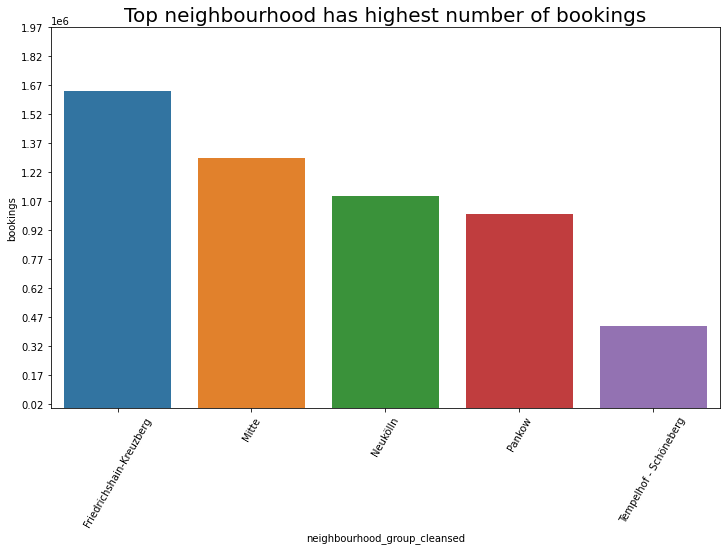

In [9]:
plt.figure(figsize= (12,7)) 
sns.barplot(x='neighbourhood_group_cleansed',y='bookings',data=neighbourhood_high_bookings.head(5))
plt.xticks(rotation = 60)
plt.yticks(range(20000,2000000,150000))
plt.title('Top neighbourhood has highest number of bookings',fontsize=20)

Top 4 areas: Friedrichshain-Kreuzberg (December), Mitte (September), Neukölln (December), Pankow (August)

# How the trend of bookings during a year, and whether the months which had highest number of bookings gained the highest revenue ? 

In [10]:
# Top neibourhood group has highest number of availability
neighbourhood_high_bookings = pd.read_sql_query("SELECT l.neighbourhood_group_cleansed, strftime('%m', date) as months, COUNT(c.available) as bookings FROM calendar_summary c LEFT JOIN listings_summary l ON c.listing_id == l.id WHERE c.available == 'f' GROUP BY l.neighbourhood_group_cleansed ORDER BY bookings DESC", con)

In [11]:
#The estimate of revenue the airbnb and rental business have earned over the year
value_revenue = pd.read_sql_query("SELECT strftime('%m', date) as months, round(SUM(substr(l.price,2)),2) AS value_revenue, COUNT(c.available) as bookings FROM calendar_summary c LEFT JOIN listings_summary l ON c.listing_id == l.id WHERE c.available == 'f' GROUP BY months ORDER BY bookings desc", con)
value_revenue

,months,value_revenue,bookings
0,11,31200501.0,562644
1,12,30549077.0,558101
2,08,30642352.0,556334
3,07,30431544.0,554795
4,05,30203033.0,553373
5,10,30395134.0,550439
6,06,29717622.0,542413
7,09,29529233.0,535612
8,03,28314381.0,529743
9,04,27098737.0,506749


In [12]:
value_revenue.sort_values('months',inplace=True)

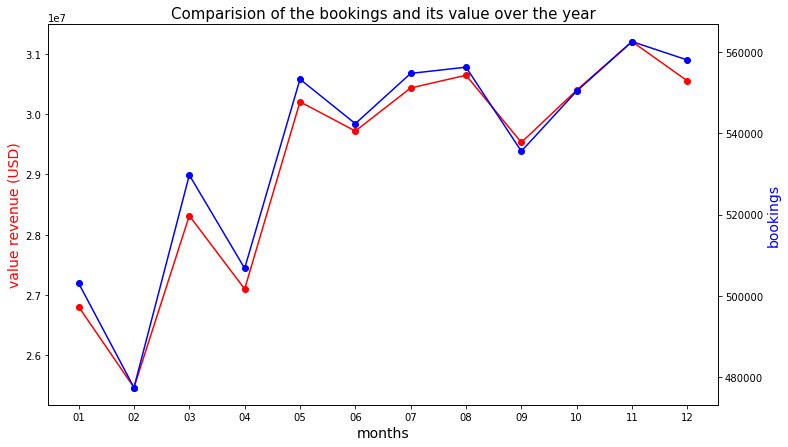

In [13]:
#Comparision of the bookings and its value over the year
fig,ax = plt.subplots(figsize= (12,7))
# make a plot
ax.plot(value_revenue.months, value_revenue.value_revenue, color="red", marker="o")
# set x-axis label
ax.set_xlabel("months",fontsize=14)
# set y-axis label
ax.set_ylabel("value revenue (USD)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(value_revenue.months, value_revenue["bookings"],color="blue",marker="o")
ax2.set_ylabel("bookings",color="blue",fontsize=14)
plt.title('Comparision of the bookings and its value over the year',fontsize=15)
plt.show()

Top 5 months gained highest revenue: November (31,200,501), December (30,549,077) , August (30,642,352), July (30,431,544)

A stats about visitors in Berlin : International guests decreased in January, increased in February according to the total accomodation. (Source:https://about.visitberlin.de/en/materialien/toolkit/tourism-stats?tagnacht=&innenaussen=&jahreszeit=&keyword=&search=&page=1) 

# What is the trend of highly available rooms over the seasons ?

In [14]:
room_available_total = pd.read_sql_query("SELECT strftime('%m', date) as months, strftime('%d', date) as days, COUNT(listing_id) as total_available_rooms FROM calendar_summary WHERE available =='t' GROUP BY months, days",con)

In [15]:
room_available_total['months']= room_available_total['months'].astype('int')
room_available_total['days'] = room_available_total['days'].astype('int')

In [16]:
room_available_total

,months,days,total_available_rooms
0,1,1,3759
1,1,2,4778
2,1,3,5337
3,1,4,5696
4,1,5,5879
...,...,...,...
360,12,27,4403
361,12,28,3871
362,12,29,3326
363,12,30,2880


In [56]:
bookings_days_of_week = pd.read_sql_query("SELECT A.month,  CASE WHEN A.day == '0' THEN 'Sun' WHEN A.day == '1' THEN 'Mon' WHEN A.day == '2' THEN 'Tues' WHEN A.day == '3' THEN 'Wed' WHEN A.day == '4' THEN 'Thu' WHEN A.day == '5' THEN 'Fri' WHEN A.day == '6' THEN 'Sat' END AS day_of_week, A.bookings FROM (SELECT strftime('%m', date) as month, strftime('%w', date) as day, COUNT(l.id) as bookings FROM calendar_summary c LEFT JOIN listings_summary l ON l.id == c.listing_id WHERE c.available =='f' GROUP BY month, day) A",con)

In [57]:
bookings_days_of_week['month']= bookings_days_of_week['month'].astype('int')
bookings_days_of_week

,month,day_of_week,bookings
0,1,Sun,64226
1,1,Mon,63856
2,1,Tues,82547
3,1,Wed,81493
4,1,Thu,81012
...,...,...,...
79,12,Tues,70403
80,12,Wed,70458
81,12,Thu,71222
82,12,Fri,72424


Text(0.5, 1.0, 'December')

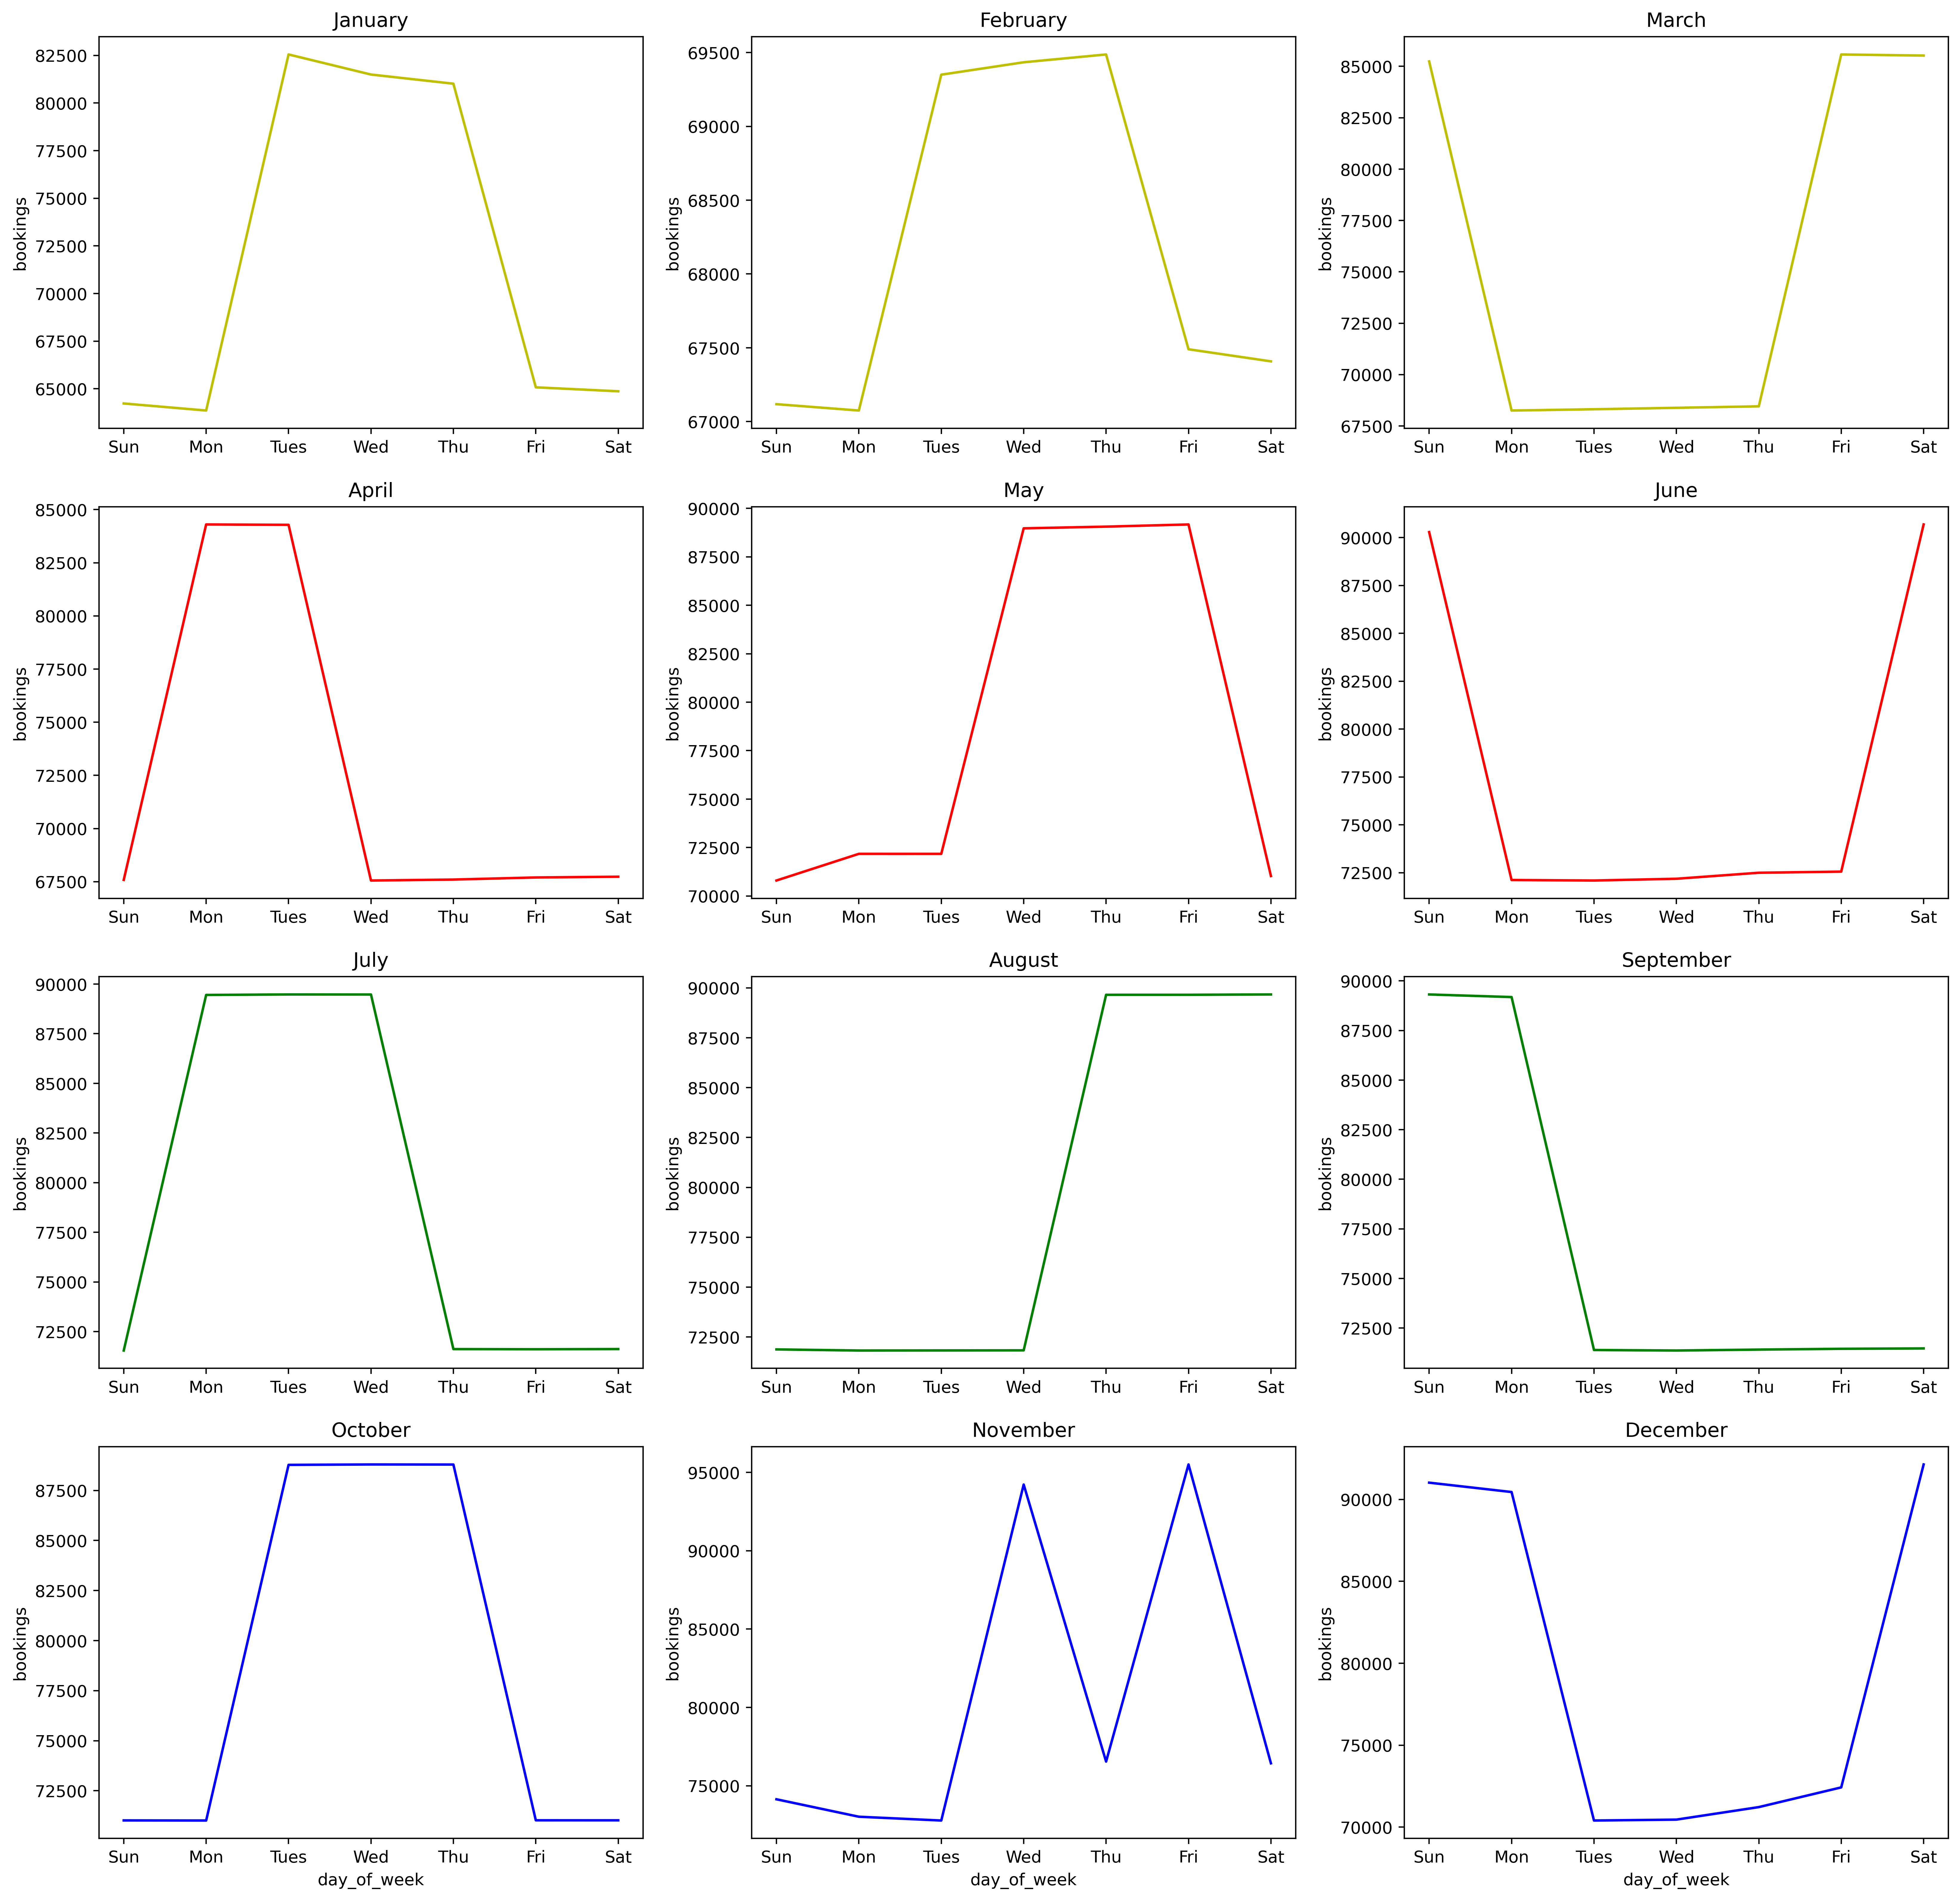

In [75]:
# create the seasonality visualization

fig, axes = plt.subplots(4,3,figsize=(20,20),dpi=400)
#spring
sns.lineplot(x = "day_of_week", y = "bookings", color = 'y', data = bookings_days_of_week[bookings_days_of_week['month'] == 1],ax = axes[0,0])
axes[0,0].set_title('January')
axes[0,0].set(xlabel=None)
sns.lineplot(x = "day_of_week", y = "bookings", color = 'y', data = bookings_days_of_week[bookings_days_of_week['month'] == 2],ax = axes[0,1])
axes[0,1].set_title('February')
axes[0,1].set(xlabel=None)
sns.lineplot(x = "day_of_week", y = "bookings", color = 'y', data = bookings_days_of_week[bookings_days_of_week['month'] == 3],ax = axes[0,2])
axes[0,2].set_title('March')
axes[0,2].set(xlabel=None)

#summer
sns.lineplot(x = "day_of_week", y = "bookings", color = 'r', data = bookings_days_of_week[bookings_days_of_week['month'] == 4],ax = axes[1,0])
axes[1,0].set_title('April')
axes[1,0].set(xlabel=None)
sns.lineplot(x = "day_of_week", y = "bookings", color = 'r', data = bookings_days_of_week[bookings_days_of_week['month'] == 5],ax = axes[1,1])
axes[1,1].set_title('May')
axes[1,1].set(xlabel=None)
sns.lineplot(x = "day_of_week", y = "bookings", color = 'r', data = bookings_days_of_week[bookings_days_of_week['month'] == 6],ax = axes[1,2])
axes[1,2].set_title('June')
axes[1,2].set(xlabel=None)


#fall
sns.lineplot(x = "day_of_week", y = "bookings", color = 'g', data = bookings_days_of_week[bookings_days_of_week['month'] == 7],ax = axes[2,0])
axes[2,0].set_title('July')
axes[2,0].set(xlabel=None)
sns.lineplot(x = "day_of_week", y = "bookings", color = 'g', data = bookings_days_of_week[bookings_days_of_week['month'] == 8],ax = axes[2,1])
axes[2,1].set_title('August')
axes[2,1].set(xlabel=None)
sns.lineplot(x = "day_of_week", y = "bookings", color = 'g', data = bookings_days_of_week[bookings_days_of_week['month'] == 9],ax = axes[2,2])
axes[2,2].set_title('September')
axes[2,2].set(xlabel=None)

#winter
sns.lineplot(x = "day_of_week", y = "bookings", color = 'b', data = bookings_days_of_week[bookings_days_of_week['month'] == 10],ax = axes[3,0])
axes[3,0].set_title('October')
sns.lineplot(x = "day_of_week", y = "bookings", color = 'b', data = bookings_days_of_week[bookings_days_of_week['month'] == 11],ax = axes[3,1])
axes[3,1].set_title('November')
sns.lineplot(x = "day_of_week", y = "bookings", color = 'b', data = bookings_days_of_week[bookings_days_of_week['month'] == 12],ax = axes[3,2])
axes[3,2].set_title('December')

The trend of bookings was not associated with different seasons, however it almost followed the same pattern: busy on weekdays then low on weekend days, and vice versa. Just only November had fluctuation.

Text(0.5, 1.0, 'December')

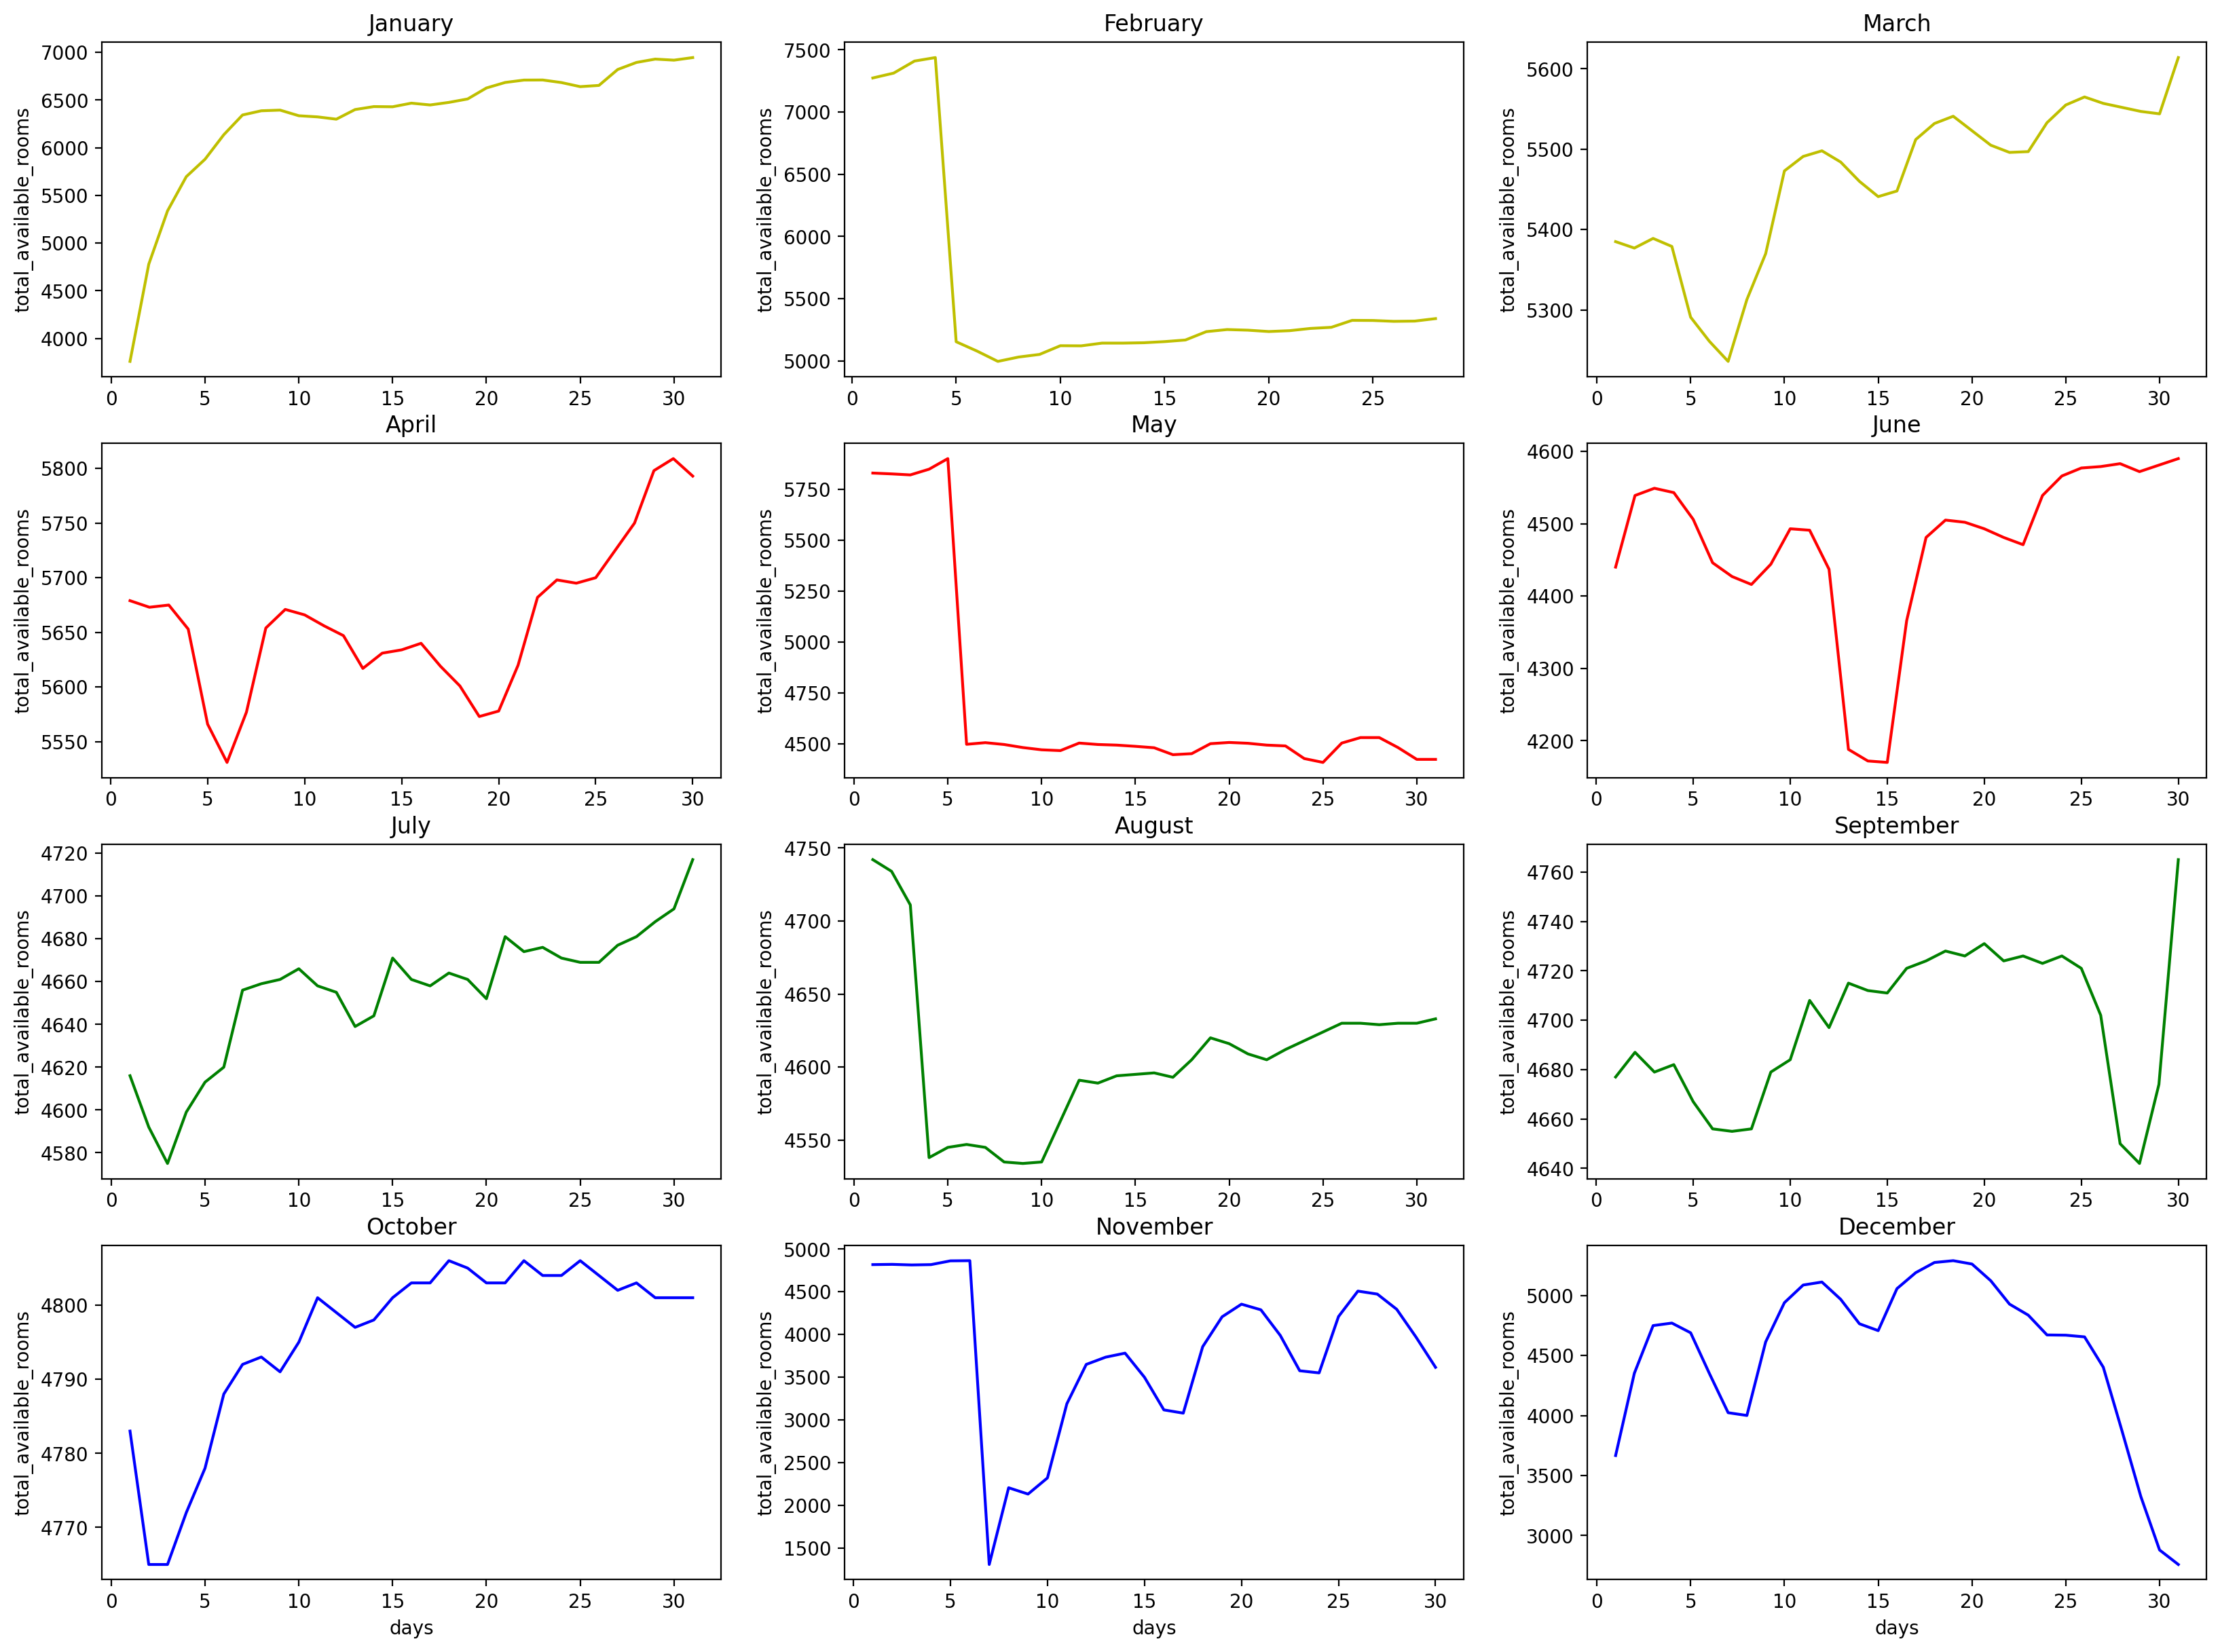

In [59]:
# create the seasonality visualization

fig, axes = plt.subplots(4,3,figsize=(20,15),dpi=200)
#spring
sns.lineplot(x = "days", y = "total_available_rooms", color = 'y', data = room_available_total[room_available_total['months'] == 1],ax = axes[0,0])
axes[0,0].set_title('January')
axes[0,0].set(xlabel=None)

sns.lineplot(x = "days", y = "total_available_rooms", color = 'y', data = room_available_total[room_available_total['months'] == 2],ax = axes[0,1])
axes[0,1].set_title('February')
axes[0,1].set(xlabel=None)
sns.lineplot(x = "days", y = "total_available_rooms", color = 'y', data = room_available_total[room_available_total['months'] == 3],ax = axes[0,2])
axes[0,2].set_title('March')
axes[0,2].set(xlabel=None)

#summer
sns.lineplot(x = "days", y = "total_available_rooms", color = 'r', data = room_available_total[room_available_total['months'] == 4],ax = axes[1,0])
axes[1,0].set_title('April')
axes[1,0].set(xlabel=None)
sns.lineplot(x = "days", y = "total_available_rooms", color = 'r', data = room_available_total[room_available_total['months'] == 5],ax = axes[1,1])
axes[1,1].set_title('May')
axes[1,1].set(xlabel=None)
sns.lineplot(x = "days", y = "total_available_rooms", color = 'r', data = room_available_total[room_available_total['months'] == 6],ax = axes[1,2])
axes[1,2].set_title('June')
axes[1,2].set(xlabel=None)


#fall
sns.lineplot(x = "days", y = "total_available_rooms", color = 'g', data = room_available_total[room_available_total['months'] == 7],ax = axes[2,0])
axes[2,0].set_title('July')
axes[2,0].set(xlabel=None)
sns.lineplot(x = "days", y = "total_available_rooms", color = 'g', data = room_available_total[room_available_total['months'] == 8],ax = axes[2,1])
axes[2,1].set_title('August')
axes[2,1].set(xlabel=None)
sns.lineplot(x = "days", y = "total_available_rooms", color = 'g', data = room_available_total[room_available_total['months'] == 9],ax = axes[2,2])
axes[2,2].set_title('September')
axes[2,2].set(xlabel=None)

#winter
sns.lineplot(x = "days", y = "total_available_rooms", color = 'b', data = room_available_total[room_available_total['months'] == 10],ax = axes[3,0])
axes[3,0].set_title('October')
sns.lineplot(x = "days", y = "total_available_rooms", color = 'b', data = room_available_total[room_available_total['months'] == 11],ax = axes[3,1])
axes[3,1].set_title('November')
sns.lineplot(x = "days", y = "total_available_rooms", color = 'b', data = room_available_total[room_available_total['months'] == 12],ax = axes[3,2])
axes[3,2].set_title('December')


The trend of each month is so different and unstable

The months have trend of increasing availability: January, March, April, July, September, October, August

The months have trend of decreasing availability: February, May

The months have trend of fluctuation availability: November, December

# Should we give more special price to fill the available rooms ?

In [18]:
room_available = pd.read_sql_query("SELECT strftime('%m', date) as months, COUNT(listing_id) as total_available_rooms FROM calendar_summary WHERE available =='t' GROUP BY months",con)
room_total = pd.read_sql_query("SELECT strftime('%m', date) as months, COUNT(listing_id) as total_rooms FROM calendar_summary GROUP BY months",con)

C:\Users\nickh\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nickh\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


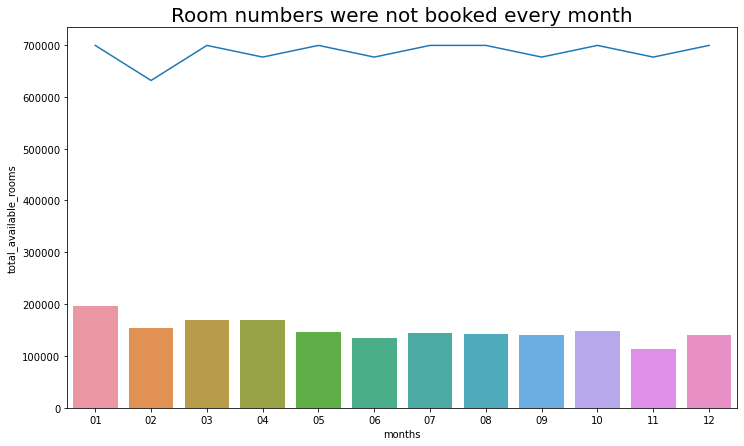

In [19]:
#the number of rooms were not booked every month
plt.figure(figsize= (12,7)) 
_ = sns.lineplot(room_total['months'],room_total['total_rooms'])
_ = sns.barplot(room_total['months'],room_available['total_available_rooms'])
_ = plt.title('Room numbers were not booked every month', fontsize=20)

Top months have highest available rooms: January, March, April

The blue line is the total rooms in each month

# Where is highly available in January? 


In [20]:
high_available_place_january = pd.read_sql_query("SELECT l.neighbourhood_group_cleansed, COUNT(c.available) as availability, strftime('%m', date) as months FROM calendar_summary c LEFT JOIN listings_summary l ON l.id == c.listing_id WHERE c.available == 't' AND months = '01' GROUP BY l.neighbourhood_group_cleansed ORDER BY availability DESC",con)

In [21]:
high_available_place_january

,neighbourhood_group_cleansed,availability,months
0,Mitte,43757,01
1,Friedrichshain-Kreuzberg,38948,01
2,Pankow,30703,01
3,Neukölln,21606,01
4,Charlottenburg-Wilm.,19329,01
5,Tempelhof - Schöneberg,16281,01
6,Treptow - Köpenick,6054,01
7,Lichtenberg,5923,01
8,Steglitz - Zehlendorf,5570,01
9,Reinickendorf,3084,01


C:\Users\nickh\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Highly available places in January')

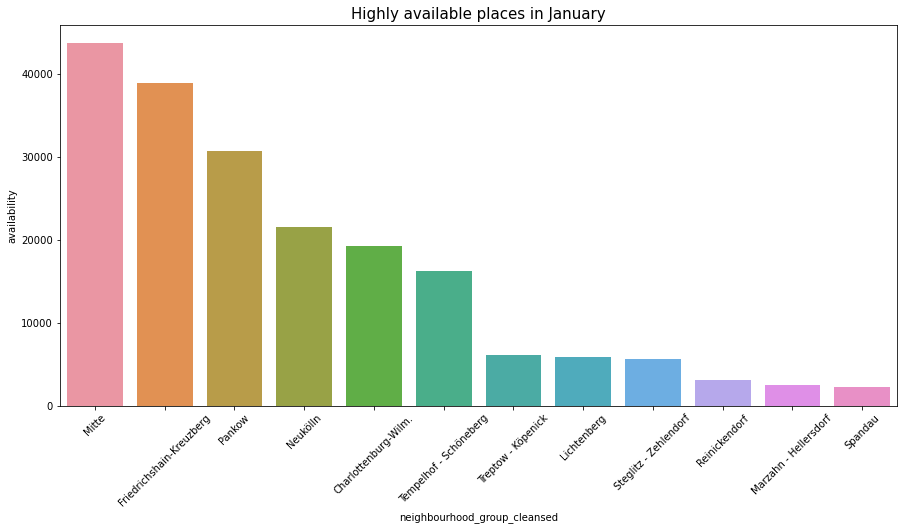

In [22]:
plt.figure(figsize= (15,7)) 
sns.barplot(high_available_place_january['neighbourhood_group_cleansed'],high_available_place_january['availability'])
plt.xticks(rotation = 45)
plt.title('Highly available places in January',fontsize=15)

Top 3 places have highly available rooms: Mitte (43757), Kreuzberg (38948) and Pankow (30703)

In [32]:
avg_price_mitte = pd.read_sql_query("SELECT strftime('%m', date) as month, ROUND(avg(substr(l.price,2))) as avg_price FROM calendar_summary c LEFT JOIN listings_summary l ON l.id == c.listing_id  WHERE l.neighbourhood_group_cleansed == 'Mitte' GROUP BY neighbourhood_group_cleansed, month",con)

available_rooms_mitte = pd.read_sql_query("SELECT strftime('%m', date) as month, COUNT(l.id) as available_rooms FROM calendar_summary c LEFT JOIN listings_summary l ON l.id == c.listing_id  WHERE l.neighbourhood_group_cleansed == 'Mitte' AND c.available =='t' GROUP BY neighbourhood_group_cleansed, month",con)

# Whether the hosts prefer lease or rent ? Where is this trend happening?


In [23]:
lease_or_rent = pd.read_sql_query("SELECT CASE WHEN maximum_nights < 180 THEN 'Less than 3 Months' WHEN maximum_nights >= 180 AND maximum_nights < 360 THEN '6 Months' WHEN maximum_nights >= 360 AND maximum_nights < 720 THEN '1 year' WHEN maximum_nights >= 720 AND maximum_nights < 1080 THEN '2 years' WHEN maximum_nights >= 1080 AND maximum_nights < 1081 THEN '3 years' ELSE 'More than 3 years' END as terms, COUNT(id) as locations FROM listings_summary WHERE maximum_nights IS NOT NULL GROUP BY terms",con)

In [24]:
lease_or_rent_areas = pd.read_sql_query("SELECT neighbourhood_group_cleansed, CASE WHEN maximum_nights < 180 THEN 'Less than 3 Months'WHEN maximum_nights >= 180 AND maximum_nights < 360 THEN '6 Months' WHEN maximum_nights >= 360 AND maximum_nights < 720 THEN '1 year' WHEN maximum_nights >= 720 AND maximum_nights < 1080 THEN '2 years' WHEN maximum_nights >= 1080 AND maximum_nights < 1081 THEN '3 years' ELSE 'More than 3 years' END as terms, COUNT(id) as locations FROM listings_summary WHERE maximum_nights IS NOT NULL GROUP BY neighbourhood_group_cleansed, terms",con)

In [25]:
lease_or_rent

,terms,locations
0,1 year,609
1,2 years,137
2,6 Months,372
3,Less than 3 Months,9888
4,More than 3 years,11546


Text(0.5, 1.0, 'The distribution of rental number in boroughs according to contract terms')

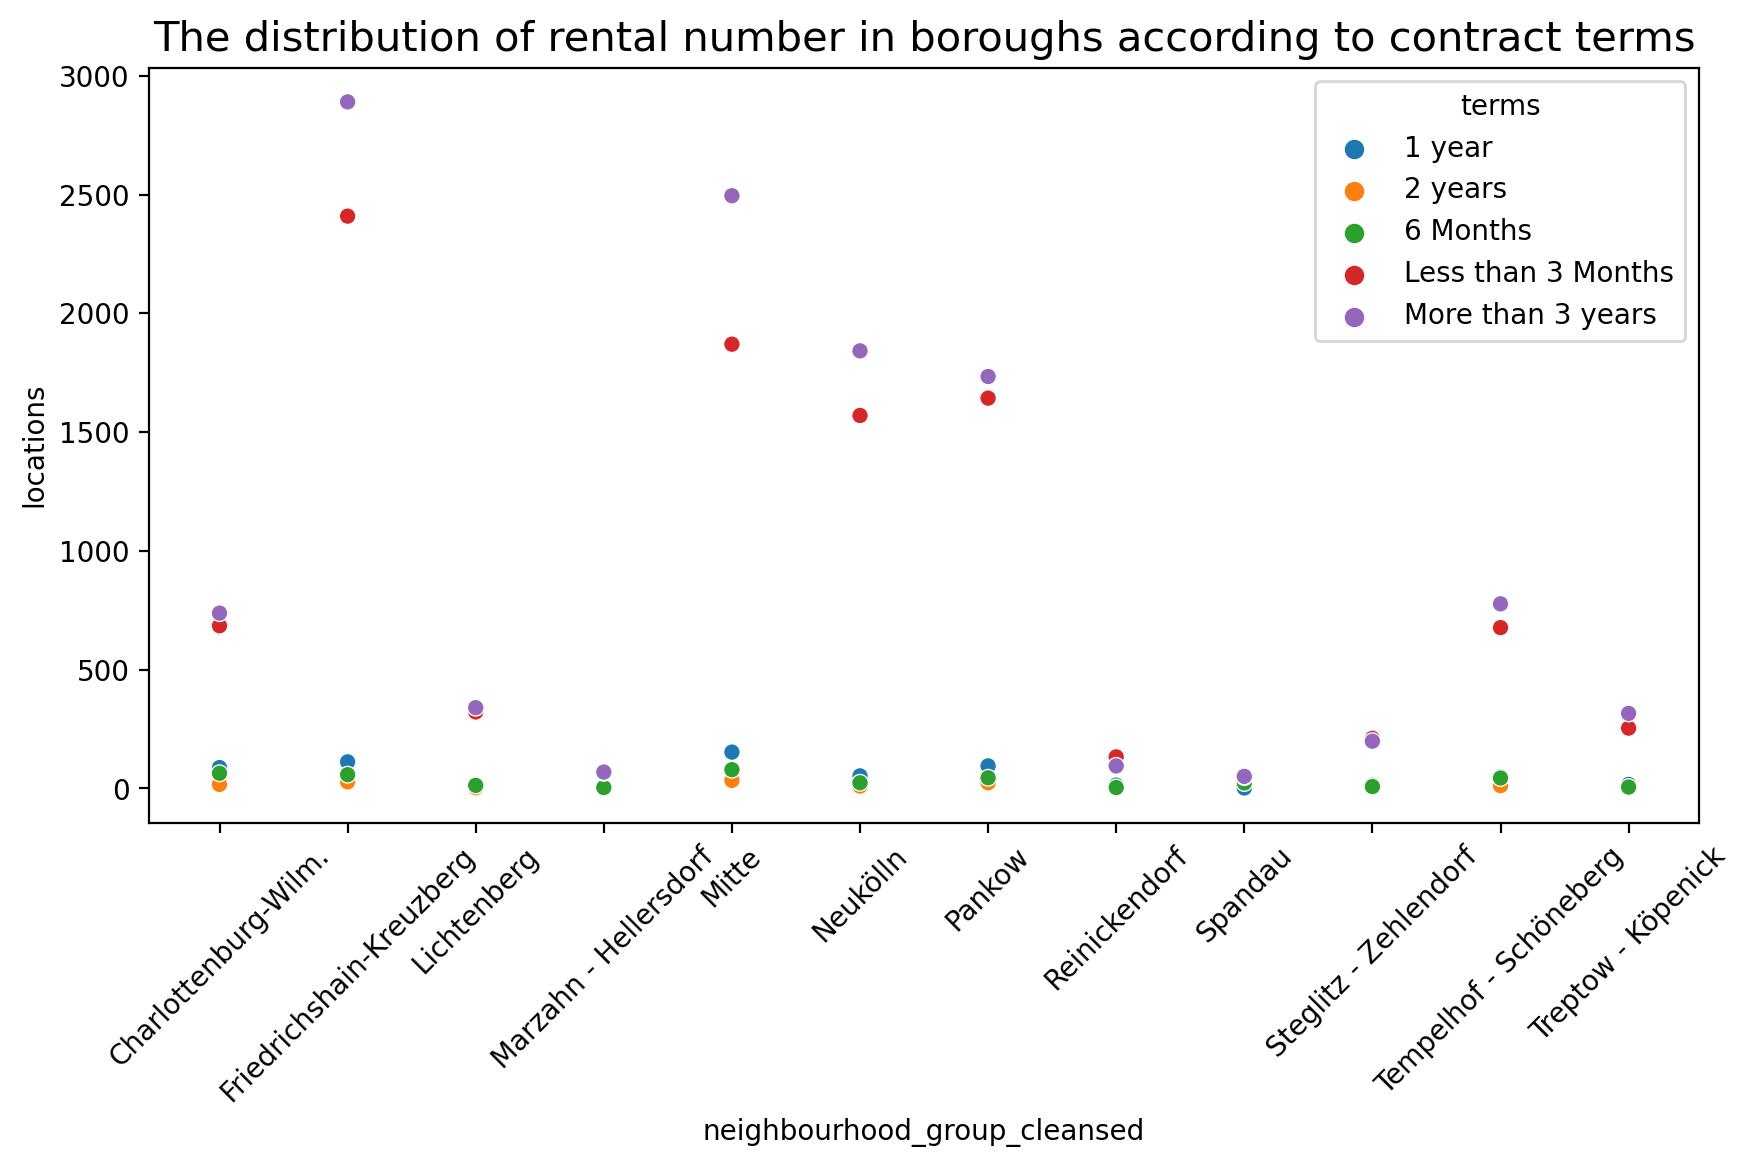

In [73]:
plt.figure(figsize= (10,5),dpi=200) 
sns.scatterplot(x = "neighbourhood_group_cleansed", y = "locations",hue='terms',data=lease_or_rent_areas)
plt.xticks(rotation = 45)
plt.title('The distribution of rental number in boroughs according to contract terms',fontsize=15)

There are many rooms for lease in Kreuzberg, Mitte, Neukollin and Pankow. The places have few or no lease such as Hellersdorf, Spandau, Reinickendorf.

# Whether Airbnb should encourage hosts to be flexible with their cancelation policy?

In [68]:
policy_with_available_room = pd.read_sql_query("SELECT A.months, A.policy, A.room_available, B.total_rooms, ( A.room_available * 100000 / B.total_rooms) as available_rate FROM (SELECT strftime('%m', date) as months, l.cancellation_policy as policy, COUNT(l.id) as room_available FROM calendar_summary c LEFT JOIN listings_summary l ON l.id == c.listing_id  WHERE c.available == 't' GROUP BY months,policy) A, (SELECT strftime('%m', date) as month, COUNT(listing_id) as total_rooms FROM calendar_summary GROUP BY month) B WHERE A.months == B.month GROUP BY A.months, A.policy;",con)

In [69]:
policy_with_available_room.head

<bound method NDFrame.head of    months                       policy  room_available  total_rooms  \
0      01                     flexible           55639       699112   
1      01                     moderate           62229       699112   
2      01  strict_14_with_grace_period           77021       699112   
3      01              super_strict_30             819       699112   
4      01              super_strict_60             330       699112   
5      02                     flexible           41145       631456   
6      02                     moderate           47170       631456   
7      02  strict_14_with_grace_period           64706       631456   
8      02              super_strict_30             779       631456   
9      02              super_strict_60             294       631456   
10     03                     flexible           44135       699112   
11     03                     moderate           51341       699112   
12     03  strict_14_with_grace_period         

Text(0.5, 1.0, 'The correlation between cancellation policy and rate of available room (0.0000)')

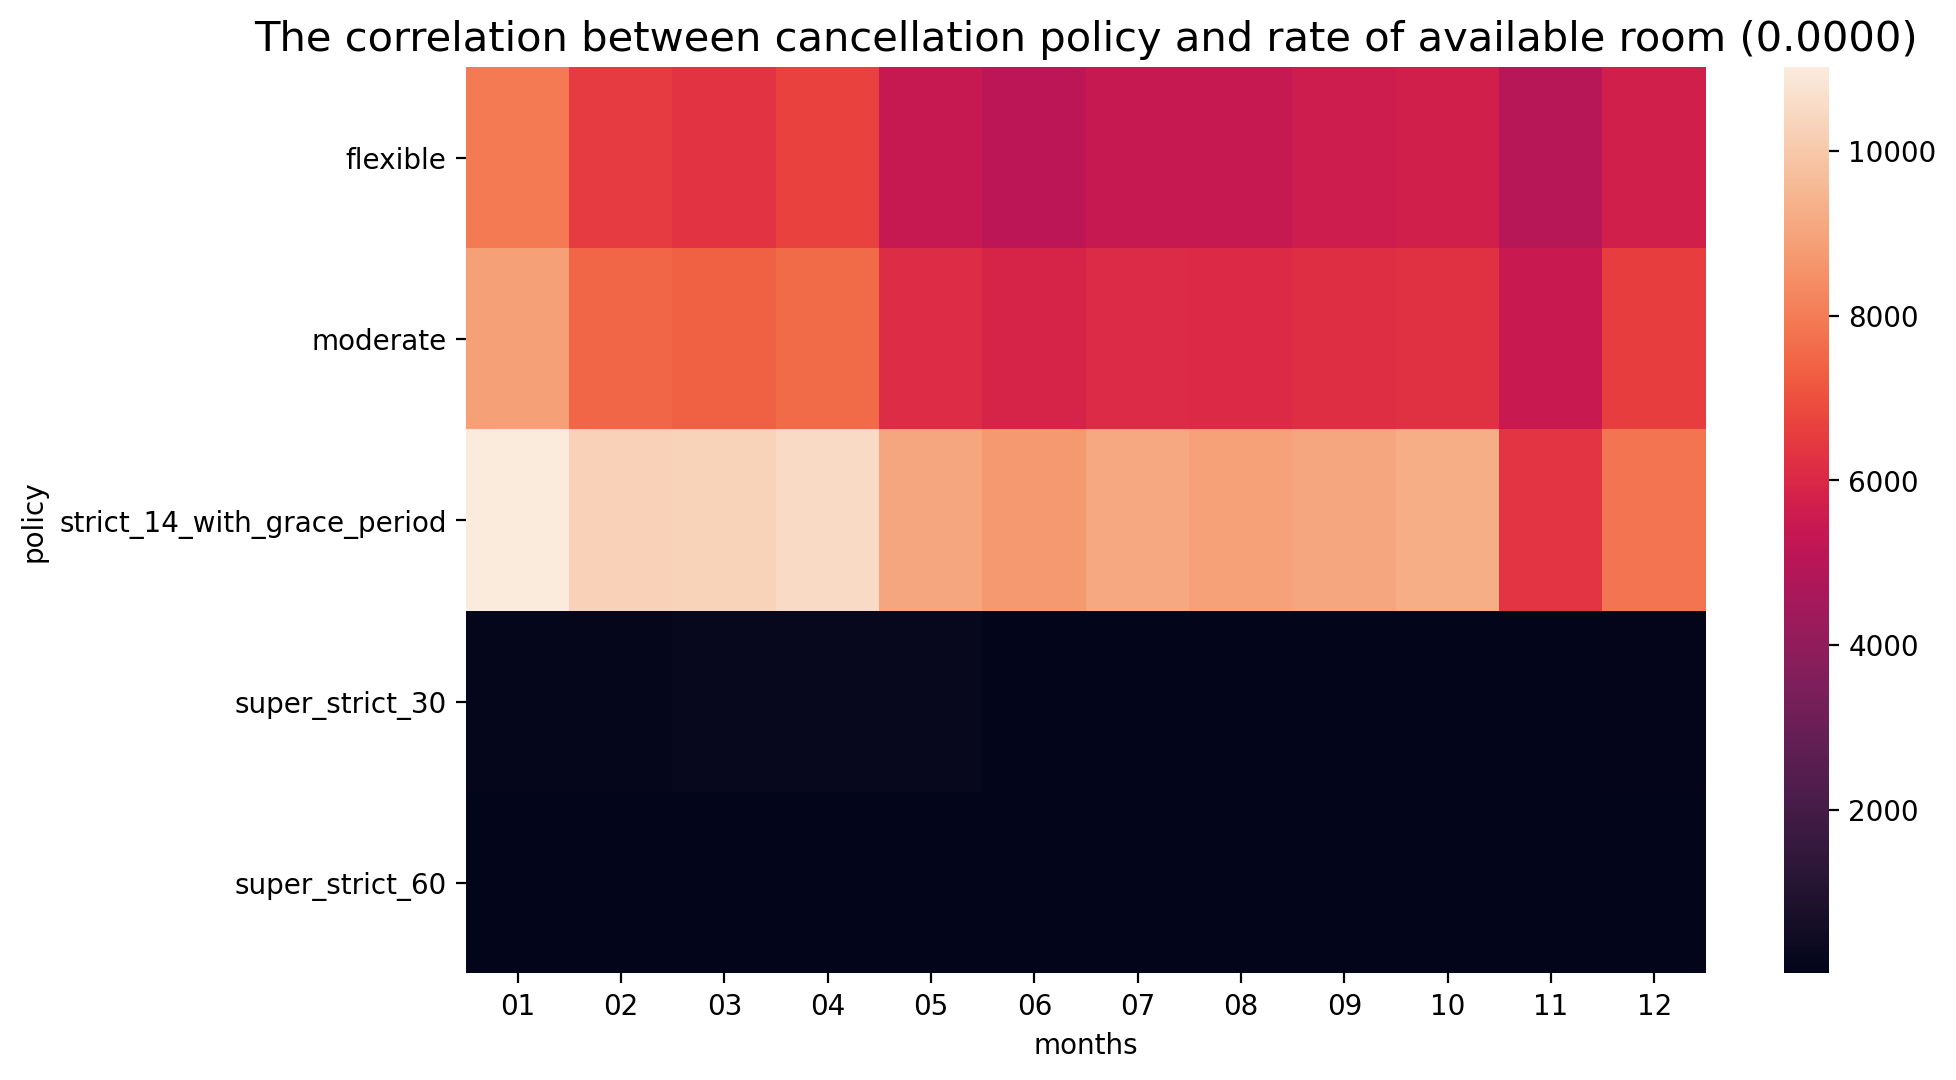

In [74]:
plt.figure(figsize= (10,6),dpi=200) 
policy_with_available_room_pivot = policy_with_available_room.pivot(index='policy',columns='months',values='available_rate')
sns.heatmap(policy_with_available_room_pivot)
plt.title('The correlation between cancellation policy and rate of available room (0.0000)',fontsize=15)

# Which neighbourhood has highest number of bookings in a month?

# How the trend of bookings during a year, and whether the months which had highest number of bookings gained the highest revenue ? 

# What is the trend of highly available rooms over the seasons ?

# Should we give more special price to fill the available rooms ?

# Whether the hosts prefer lease or rent ? Where is this trend happening?


+Top 4 areas: Friedrichshain-Kreuzberg (December), Mitte (September), Neukölln (December), Pankow (August)

+Top 5 months gained highest revenue: November (31,200,501), December (30,549,077) , August (30,642,352), July (30,431,544)

+The trend of each month is so different and unstable

+The months have trend of increasing availability: January, March, April, July, September, October, August

+The months have trend of decreasing availability: February, May

+The months have trend of fluctuation availability: November, December

+Top months have highest available rooms: January, March, April

+The blue line is the total rooms in each month

+Top 3 places have highly available rooms: Mitte (43757), Kreuzberg (38948) and Pankow (30703)

+There are many bookings for lease in Kreuzberg, Mitte, Neukollin and Pankow. The places have few or no lease such as Hellersdorf, Spandau, Reinickendorf.

# Issues: 

+ The far the distance was from center, The less the number of bookings 
-> The distribution of accomodations is not normal in Berlin, even the transportation system is very common. 
+ The distribution of bookings was unstable in every month 
+ There were low bookings in some months of the summer (July, September & October) when was the busiest season of visitors in Berlin 
-> This caused more loss for the hosts and business throughout the year, the forecasting on guests will be significantly complicated and requires more dimensions inputs. 

+ The decrease of bookings in Spring led to low revenue (below 28,314,381)
+ Places in Mitte had high availability in January (above 40,000 places) 
-> Less international guests would probably had huge impact on the business's revenue. The lack of rental guests in January in Mitte was an example. The huge loss in Mitte would affect the long-term business operation. 

+ The number of available rooms was still large compared to the capacity 
-> Airbnb was still not able to fill the availability effectively, there was still many available rooms left over the season without any promoting plans.
 
+ Hosts in popular places prefer the lease contract 
-> The number of bookings for lease in Kreuzberg, Mitte, Neukollin and Pankow. Thus, these places might be suitable for who travel for work or long trip.  

+ Strict policy limited the bookings, the strict policy in low season could cause more loss. For example, the strict 14 days almost had high rate of availability in the whole season. 
-> The conservative policy in some places can potentially affect the interest of customers in long term.


# Solutions:

- Airbnb should promote more the accomocations in low areas to increase the interest of customers, instead of just focusing on the popular areas which affect the diversity of platform. In another side. Customers will tend to change into local platforms to look for unique places out of the center.

- The accurate forecasting of customers in and out during a month will help business keep track of the coming bookings to manage the availability, limit the sudden fall of bookings and quickly have plan for promotion. 

- The business should keep track with the amount of international guests every year to attract more potential customers, and has good strategy to make policy more appropriate for with partners to support their business operation.

- The available rooms should be promoted with more special price and events to maximize the revenue every month.

- Ensure the potential customers for lease place because it will maintain the profit efficiently.

- Being flexible on low months, minimize the risk of available rooms, especially when it is located in less popular places.

# Thank you !!!